In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [17]:
data = pd.read_csv("NJ.csv")
data.head()


,FIPS,County,Population
0,34001,Atlantic County,274549
1,34003,Bergen County,905116
2,34005,Burlington County,448734
3,34007,Camden County,513657
4,34009,Cape May County,97265


In [18]:
stats = data['Population'].describe()
stats

count        21.000000
mean     418661.619048
std      252391.802799
min       66083.000000
25%      156898.000000
50%      448734.000000
75%      576567.000000
max      905116.000000
Name: Population, dtype: float64

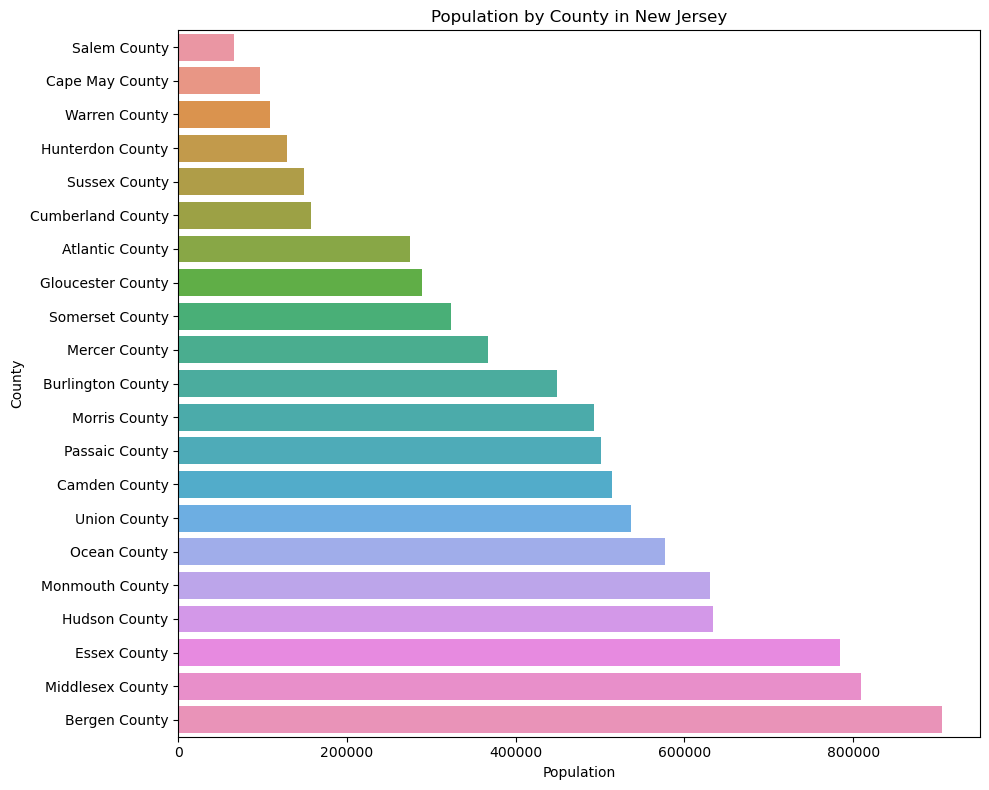

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Population', y='County', data=data.sort_values('Population'))
plt.title('Population by County in New Jersey')
plt.xlabel('Population')
plt.ylabel('County')
plt.tight_layout()

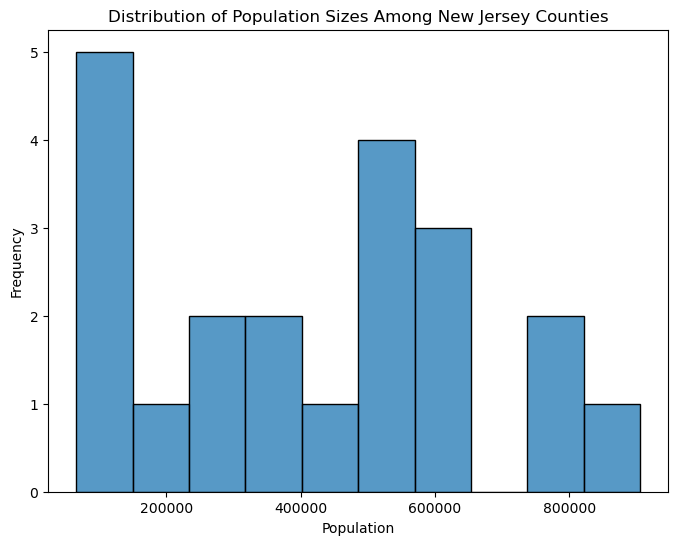

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Population'], bins=10)
plt.title('Distribution of Population Sizes Among New Jersey Counties')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


In [21]:
nj_counties = gpd.read_file('County_Boundaries_of_NJ.geojson')

In [22]:
print("Columns in nj_counties:", nj_counties.columns)
print("Columns in data:", data.columns)


Columns in nj_counties: Index(['OBJECTID', 'COUNTY', 'COUNTY_LABEL', 'CO', 'GNIS_NAME', 'GNIS',
       'FIPSSTCO', 'FIPSCO', 'ACRES', 'SQ_MILES', 'POP2020', 'POP2010',
       'POP2000', 'POP1990', 'POP1980', 'POPDEN2020', 'POPDEN2010',
       'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object')
Columns in data: Index(['FIPS', 'County', 'Population'], dtype='object')


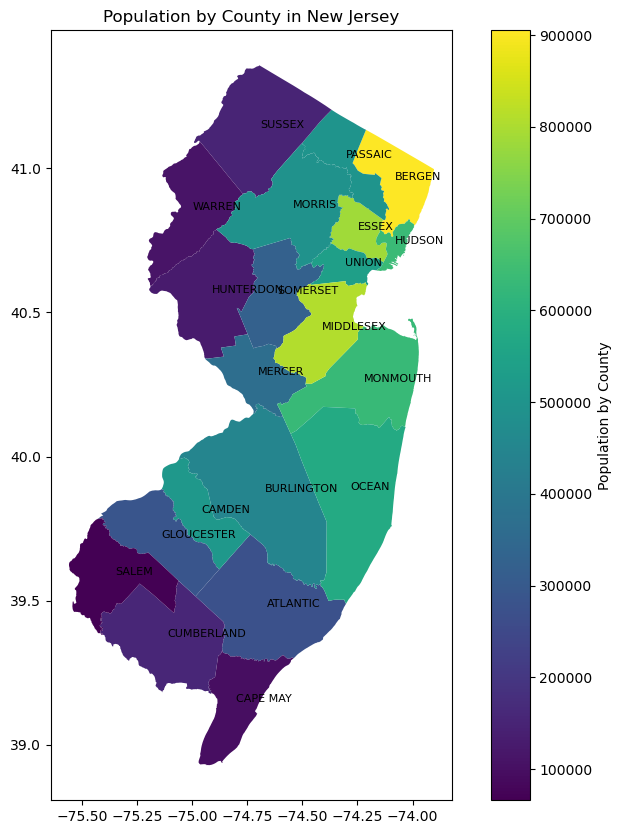

In [23]:
data['County'] = data['County'].str.upper().str.replace(' COUNTY', '')  
data.head()

nj_population = pd.merge(nj_counties, data, left_on='COUNTY', right_on='County')
fig, ax = plt.subplots(figsize=(10, 10))
nj_population.plot(column='Population', legend=True, ax=ax,
                   legend_kwds={'label': 'Population by County'},
                   cmap='viridis')

# Add labels
for idx, row in nj_population.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['COUNTY'], fontsize=8)

ax.set_title('Population by County in New Jersey')
plt.show()